In [1]:
# import basic libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
startup_df = pd.read_csv('50_startups.csv')
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
startup_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [26]:
startup_df.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
25,64664.71,139553.16,137962.62,California,107404.34
5,131876.90,99814.71,362861.36,New York,156991.12
30,61994.48,115641.28,91131.24,Florida,99937.59
20,76253.86,113867.30,298664.47,California,118474.03
35,46014.02,85047.44,205517.64,New York,96479.51
40,28754.33,118546.05,172795.67,California,78239.91
1,162597.70,151377.59,443898.53,California,191792.06
24,77044.01,99281.34,140574.81,New York,108552.04
37,44069.95,51283.14,197029.42,California,89949.14


In [28]:
startup_new_df = startup_df.drop(columns='State', axis=1, inplace=True)
startup_new_df = startup_df
startup_new_df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


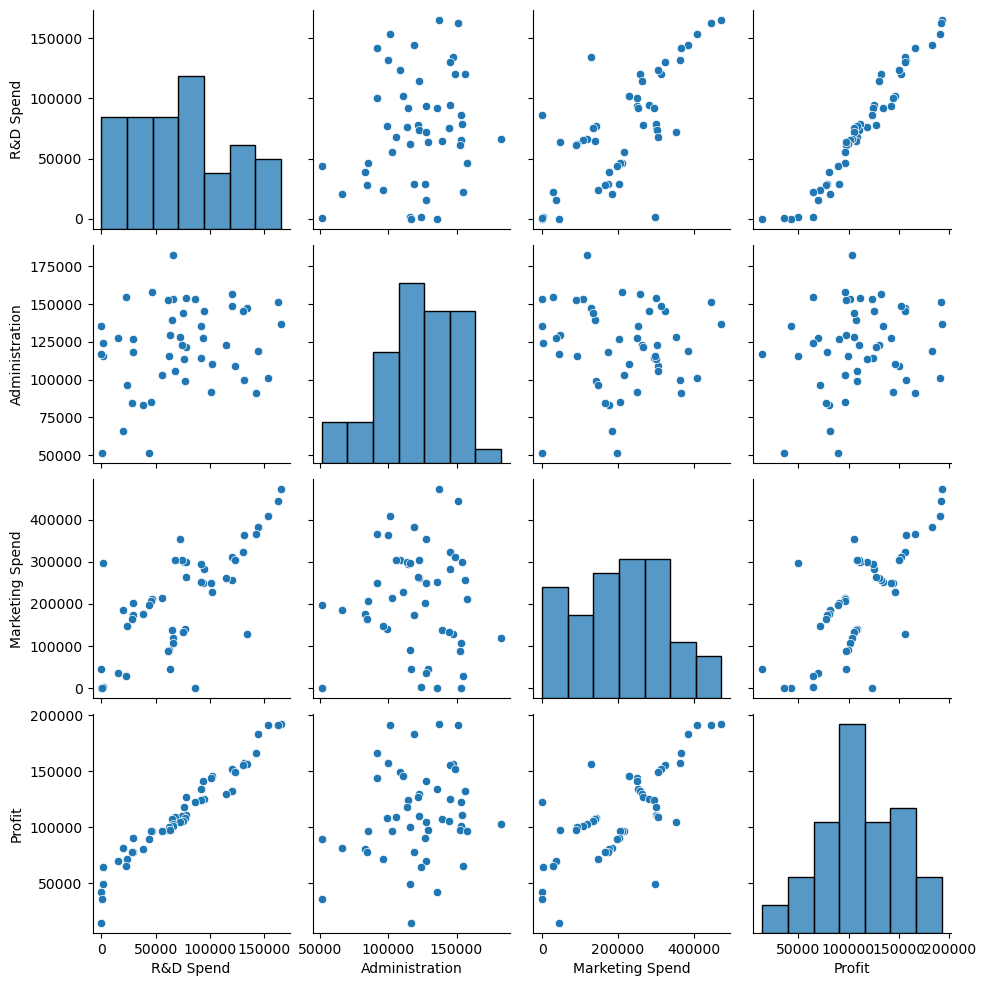

In [29]:
sns.pairplot(startup_new_df)

In [30]:
startup_new_df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [39]:
new_col_names = ['RD_Spend', 'Admin', 'Marketing_Spend', 'Profit']
startup_new_df.columns = new_col_names # rename columns in format that are compatiable with smf.ols syntax stuff

In [40]:
# make sure column name changes took effect
startup_new_df.head()

,RD_Spend,Admin,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [41]:
# Prepare a model considering all variables
import statsmodels.formula.api as smf # for regression model

ml1 = smf.ols('Profit ~ RD_Spend + Admin + Marketing_Spend', data=startup_new_df).fit()

#summary
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        10:48:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Admin              -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

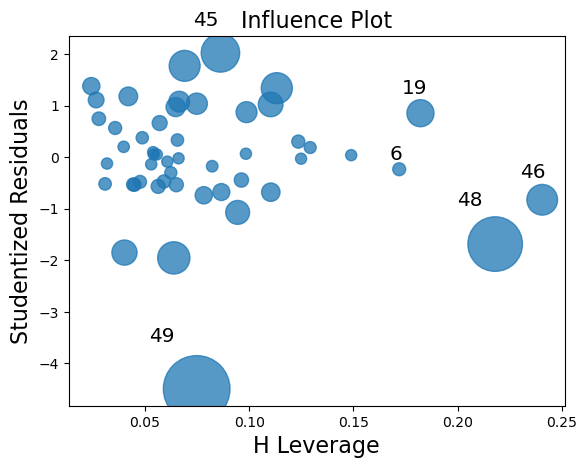

In [42]:
# Check whether the data has any influential values
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)

In [43]:
startup_new_df = startup_new_df.drop(startup_new_df.index[[49]])

In [44]:
# preparing new model with index value with large influence dropped

ml_new = smf.ols('Profit ~ RD_Spend + Admin + Marketing_Spend', data=startup_new_df).fit()

#summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           8.85e-32
Time:                        10:56:35   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD_Spend            0.7830      0.038     20.470      0.000       0.706       0.860
Admin              -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# Check for colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = Colinearity
# calculating VIF's values of independent variable

rsq_profit = smf.ols('Profit ~ RD_Spend + Admin + Marketing_Spend', data=startup_new_df).fit().rsquared
vif_profit = 1/(1-rsq_profit)

rsq_admin = smf.ols('Admin ~ Profit + RD_Spend + Marketing_Spend', data =startup_new_df).fit().rsquared  
vif_admin = 1/(1 - rsq_admin)

rsq_RD = smf.ols('RD_Spend ~ Profit + Admin + Marketing_Spend', data =startup_new_df).fit().rsquared  
vif_RD = 1/(1 - rsq_RD) 

rsq_marketing = smf.ols('Marketing_Spend ~ Profit + Admin + RD_Spend', data =startup_new_df).fit().rsquared  
vif_marketing = 1/(1 - rsq_marketing) 

print('vif_profit',vif_profit,'vif_admin',vif_admin,'vif_RD', vif_RD,'vif_marketing',vif_marketing)

vif_profit 25.850643546876412 vif_admin 1.1821760382982025 vif_RD 24.517310454523525 vif_marketing 2.4058142948020564


In [46]:
df1 = {'Variables':['Profit', 'Admin', 'R&D', 'Marketing'], 'VIF':[vif_profit, vif_admin, vif_RD, vif_marketing]}
vif_df = pd.DataFrame(df1)
vif_df

,Variables,VIF
0,Profit,25.850644
1,Admin,1.182176
2,R&D,24.517310
3,Marketing,2.405814


## None of the independent variables appear to have a super high VIF score compared to other examples I have done. I do not know if there is a cutoff for VIF values that should be implemented so I know when to drop a column. I know VIF over 10 is significant, but I don't know if I should drop any columns here, so I am not as the model seems pretty accurate as is

In [48]:
final_ml = smf.ols('Profit ~ RD_Spend + Admin + Marketing_Spend', data=startup_new_df).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           8.85e-32
Time:                        11:06:59   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD_Spend            0.7830      0.038     20.470      0.000       0.706       0.860
Admin              -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
pred = final_ml.predict(startup_new_df)

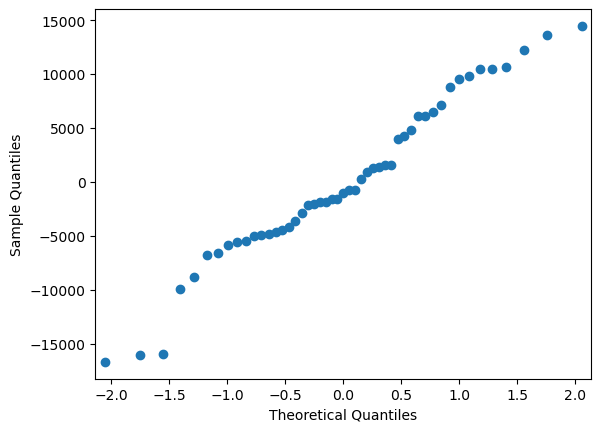

In [52]:
# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

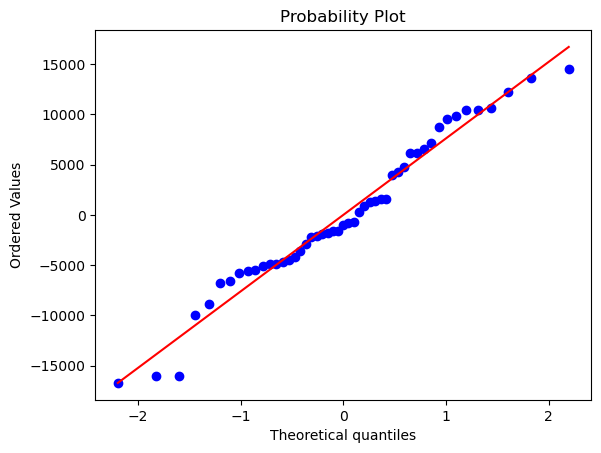

In [55]:
from scipy import stats
import pylab
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

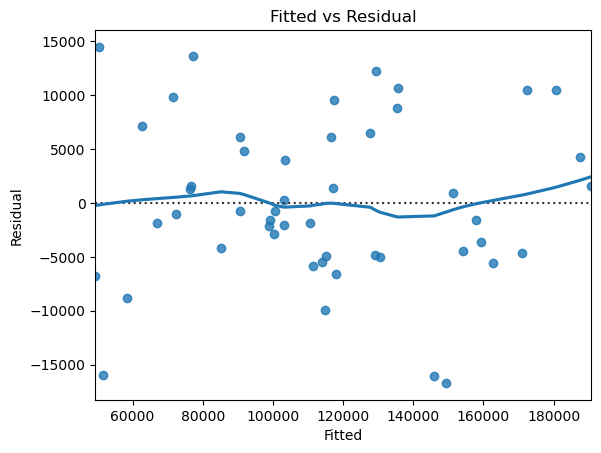

In [57]:
# Residuals vs. Fitted Plot
sns.residplot(x=pred, y=startup_new_df.Profit, lowess=True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

startup_train, startup_test = train_test_split(startup_new_df, test_size = 0.20)

In [59]:
# Prep model on training data
model_train = smf.ols('Profit ~ RD_Spend + Admin + Marketing_Spend', data=startup_train).fit()

In [60]:
# prediction on test data
test_pred = model_train.predict(startup_test)

In [61]:
# test residual values
test_resid = startup_new_df.Profit - test_pred
#RMSE value for test data
#test_rmse = np.sqrt(np.mean(test_resid * test_resid))
#test_rmse

9987.226143041287

In [62]:
test_resid

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8       383.774336
9              NaN
10    11518.854035
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27    -9354.153852
28      707.299852
29             NaN
30     1272.625304
31     -344.304077
32             NaN
33             NaN
34             NaN
35     7199.917891
36    15499.851383
37             NaN
38    13114.992132
39             NaN
40             NaN
41             NaN
42             NaN
43             NaN
44             NaN
45    17629.230339
46             NaN
47             NaN
48             NaN
dtype: float64